In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("jobs.csv")

df = df[df["Must haves"].apply(lambda x: not isinstance(x, float) and "Python" in x)]
df["Salary (mean)"] = (df["Bottom salary"] + df["Top salary"]) / 2
df.describe()

,Remote,Bottom salary,Top salary,Salary (mean)
count,213.000000,213.000000,213.000000,213.000000
mean,0.624413,20267.600939,26935.117371,23601.359155
std,0.485415,7357.433082,10464.685130,8681.974139
min,0.000000,3000.000000,5544.000000,4500.000000
25%,0.000000,15120.000000,20160.000000,18480.000000
50%,1.000000,20000.000000,26880.000000,23750.000000
75%,1.000000,25200.000000,31500.000000,28238.000000
max,1.000000,46000.000000,70000.000000,57500.000000


In [115]:
def apply_bar_counters(series: pd.Series) -> None:
        for i in range(len(series)):
                plt.text(i, series.iloc[i] + (series.iloc[0] * 0.01), series.iloc[i], ha="center")

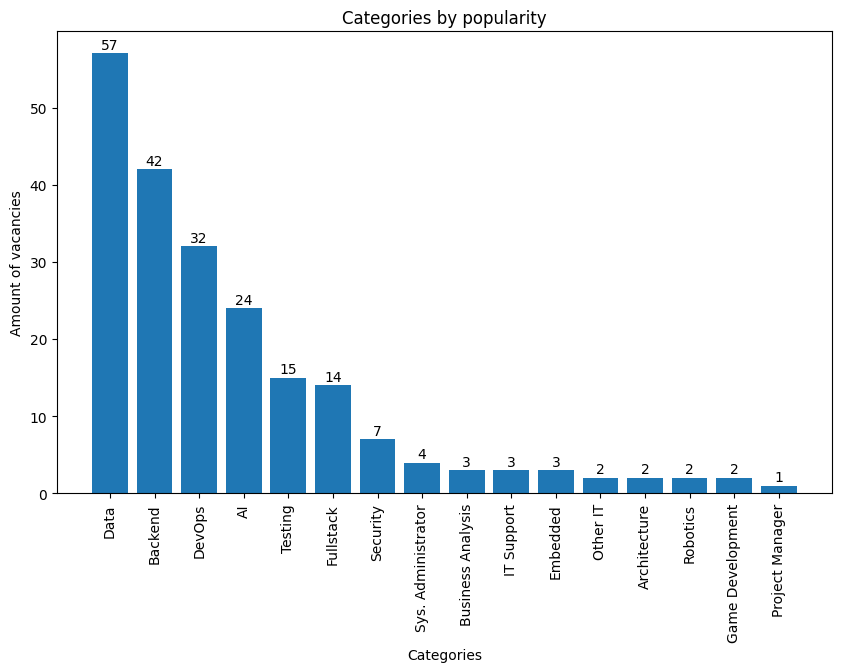

In [116]:
# Categories
categories = df["Category"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(categories.index.to_list(), height=categories, width=0.8)
plt.xticks(rotation=90)
plt.title("Categories by popularity")
plt.ylabel("Amount of vacancies")
plt.xlabel("Categories")

apply_bar_counters(categories)

In [25]:
from matplotlib.axes import Axes


def plot_technologies(axs: Axes, x: int, y: int, category: str | None = None, amount: int = 10) -> None:
    if category:
        must_haves = df[df["Category"] == category]["Must haves"]
        axs[x, y].set_title(category)
    else:
        must_haves = df["Must haves"]
        axs[x, y].set_title("All categories")

    must_haves = must_haves.str.split(",").explode()
    must_haves = must_haves.value_counts().sort_values(ascending=False)

    must_haves_labels = must_haves.index.to_list()[1:amount + 1]
    must_haves_values = must_haves[1:amount + 1]

    axs[x, y].bar(must_haves_labels, must_haves_values)
    axs[x, y].tick_params("x", labelrotation=45)



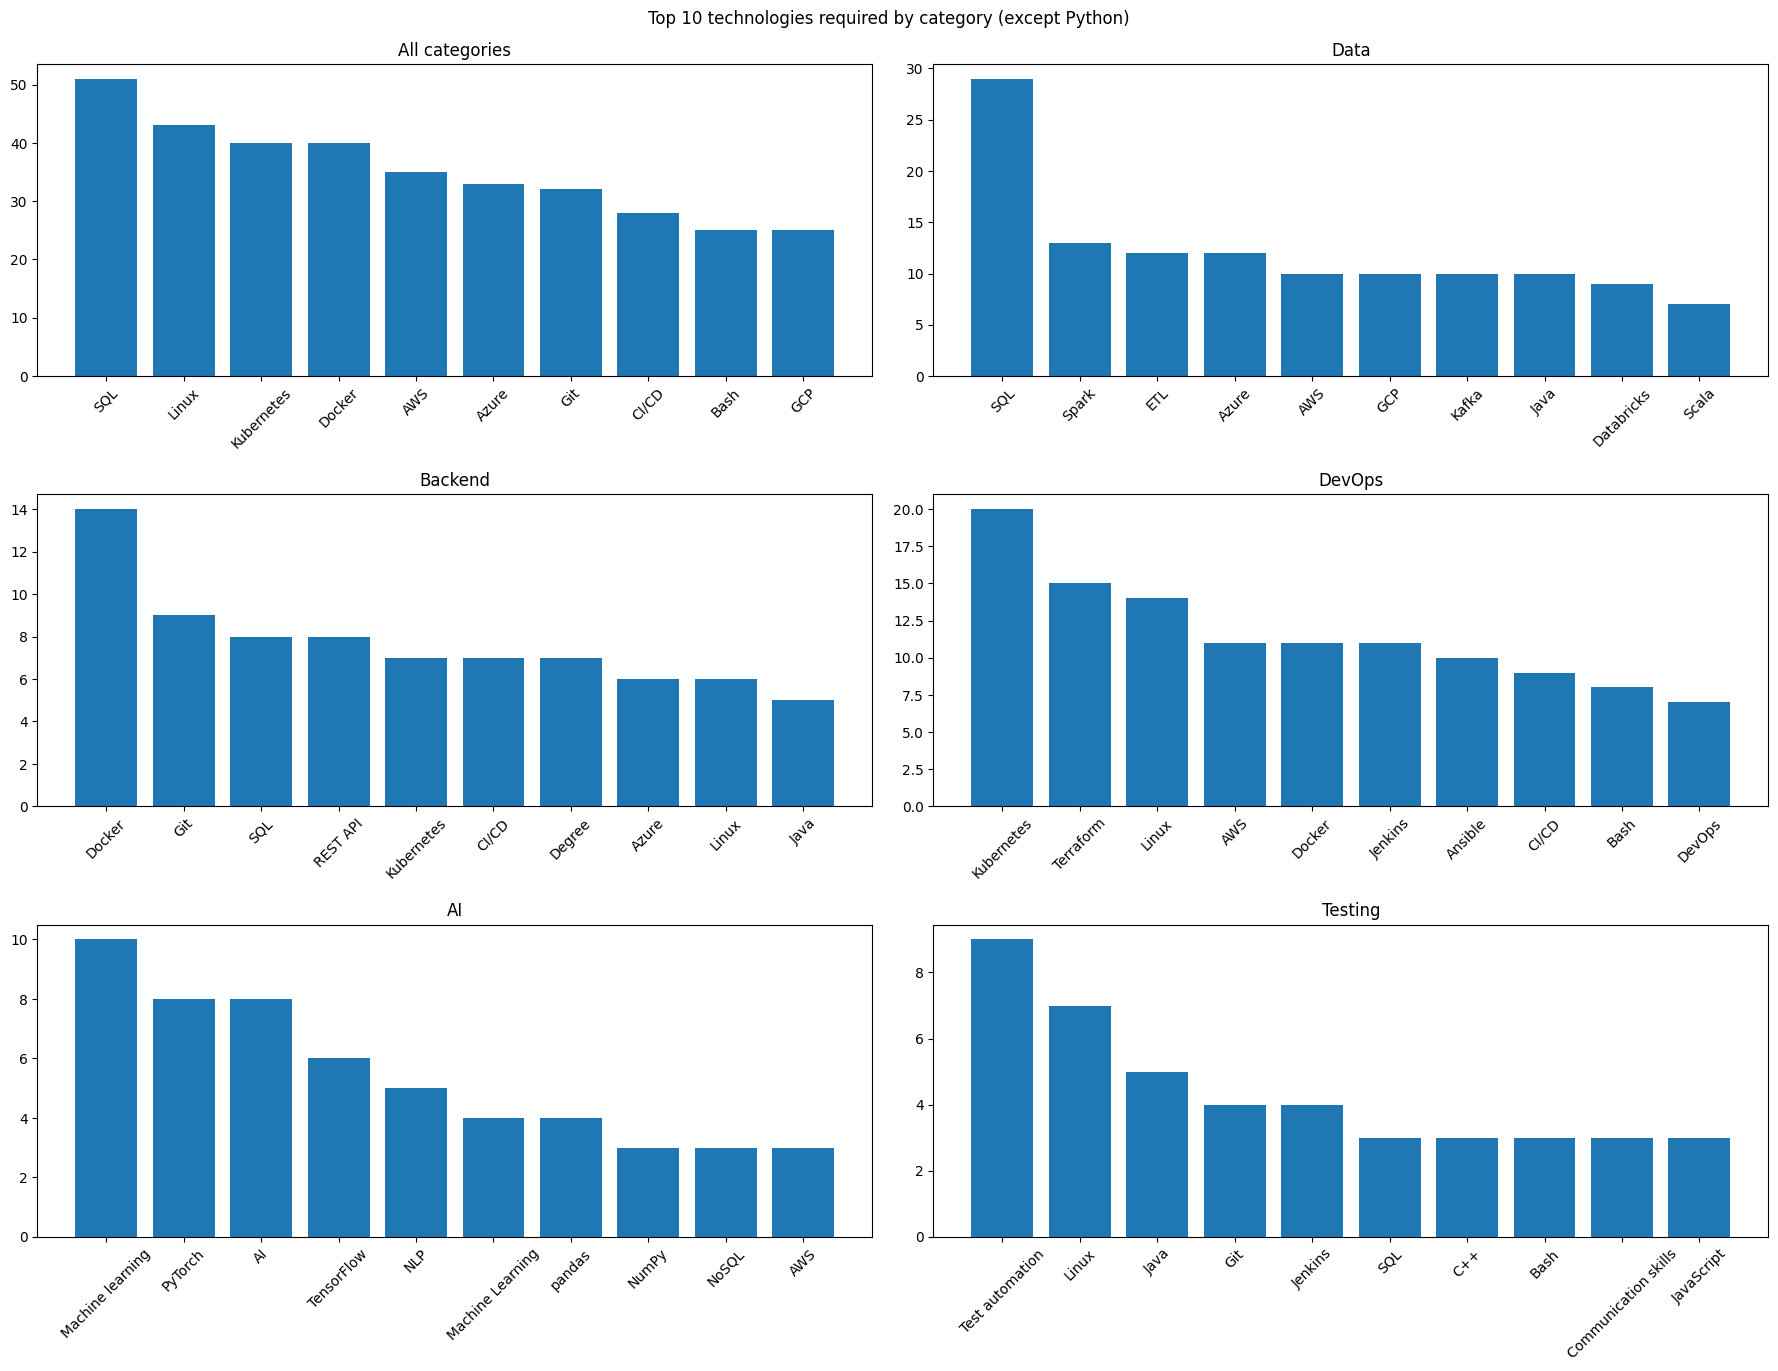

In [49]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(18, 14)
fig.suptitle("Top 10 technologies required by category (except Python)")

plot_technologies(axs, 0, 0)
plot_technologies(axs, 0, 1, "Data")
plot_technologies(axs, 1, 0, "Backend")
plot_technologies(axs, 1, 1, "DevOps")
plot_technologies(axs, 2, 0, "AI")
plot_technologies(axs, 2, 1, "Testing")

fig.tight_layout(pad=1.5)

Text(0.5, 1.0, 'Possibilities to work remotely')

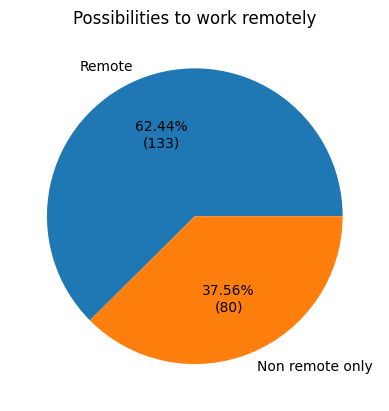

In [133]:
from utils import make_autopct

# Remote vs non-remote works
remotes_count = df["Remote"].value_counts()

labels = ["Remote", "Non remote only"]
plt.pie(remotes_count, labels=labels, autopct=make_autopct(remotes_count))
plt.title("Possibilities to work remotely")


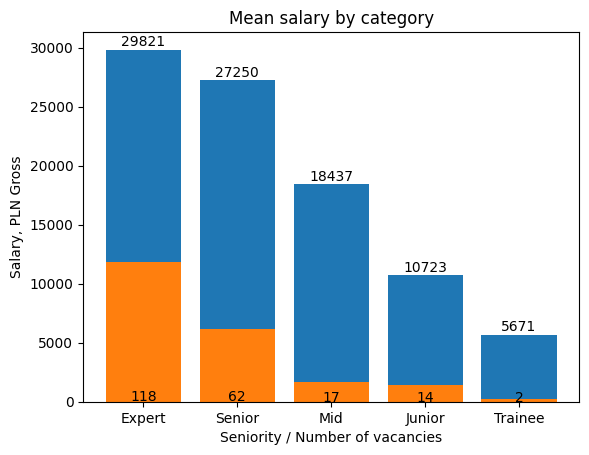

In [124]:
# Salary by Seniority
seniority_count = df["Seniority"].value_counts().sort_values(ascending=False)
salaries_by_seniority = df.groupby("Seniority").mean("Salary (mean)")["Salary (mean)"].astype(int).sort_values(ascending=False)

labels = ["Trainee", "Junior", "Mid", "Senior", "Expert"][::-1]
plt.bar(labels, salaries_by_seniority)
plt.bar(labels, seniority_count * 100)

plt.title("Mean salary by seniority")
plt.ylabel("Salary, PLN Gross")
plt.xlabel("Seniority / Number of vacancies")

apply_bar_counters(seniority_count)
apply_bar_counters(salaries_by_seniority)

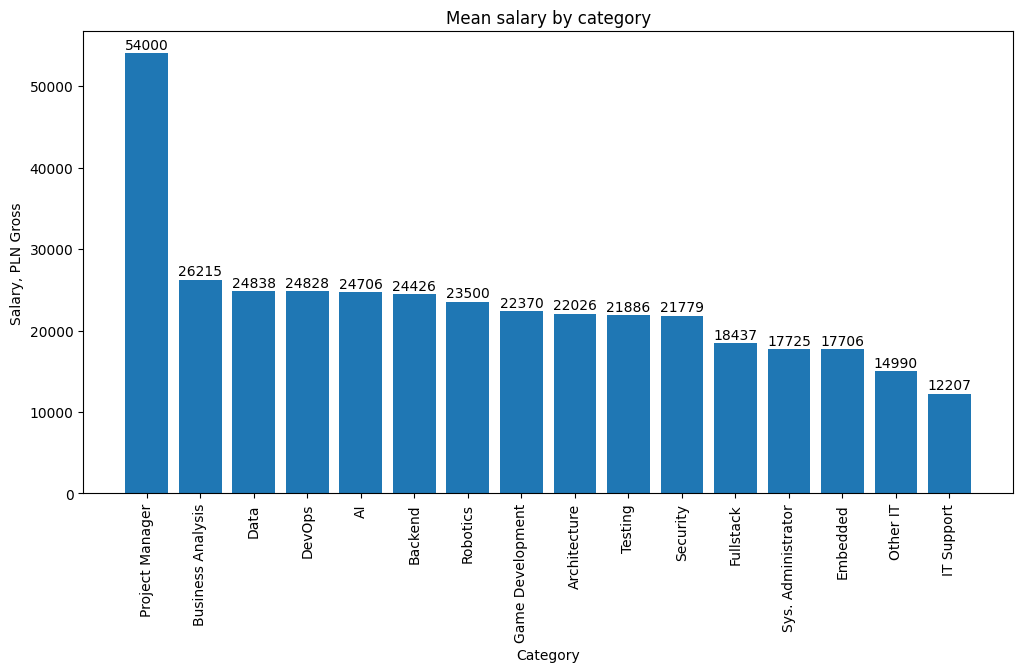

In [125]:
# Salary by Category
salaries_by_category = df.groupby("Category").mean("Salary (mean)")["Salary (mean)"].astype(int).sort_values(
    ascending=False
    )

labels = salaries_by_category.index.to_list()

plt.figure(figsize=(12, 6))
plt.bar(labels, salaries_by_category)

plt.title("Mean salary by category")
plt.ylabel("Salary, PLN Gross")
plt.xlabel("Category")
plt.xticks(rotation=90)

apply_bar_counters(salaries_by_category)